In [1]:
import pandas as pd
import calendar
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [3]:
df["production_budget"] = df["production_budget"].str.replace(",","").str.replace("$","").astype(int)
df["domestic_gross"] = df["domestic_gross"].str.replace(",","").str.replace("$","").astype(int)
df["worldwide_gross"] = df["worldwide_gross"].str.replace(",","").str.replace("$","").astype(int)


In [4]:
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [5]:
df['profit'] = df['worldwide_gross'] - df['production_budget']
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400


In [6]:
df['return_rate'] = df['profit']/df['production_budget']

In [7]:
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,return_rate
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000,-1.000000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495,39.082500
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,-0.732400
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400,-1.000000


In [8]:


df_2 = df.loc[df['profit'] > 0 ]
df_2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,return_rate
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,5.710167
...,...,...,...,...,...,...,...,...
5773,74,"Feb 26, 1993",El Mariachi,7000,2040920,2041928,2034928,290.704000
5774,75,"Oct 8, 2004",Primer,7000,424760,841926,834926,119.275143
5775,76,"May 26, 2006",Cavite,7000,70071,71644,64644,9.234857
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495,39.082500


## What Genre Is the most profitible?

In [9]:
df_profit = df_2.sort_values(by=['profit'], ascending = False )
top_20_profit = df_profit.head(20)
top_20_profit

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,return_rate
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,10.041042
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,5.827114
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,5.710167
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,6.669092
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,6.993278
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897,5.746382
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,9.733545
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,5.741291
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,6.681016


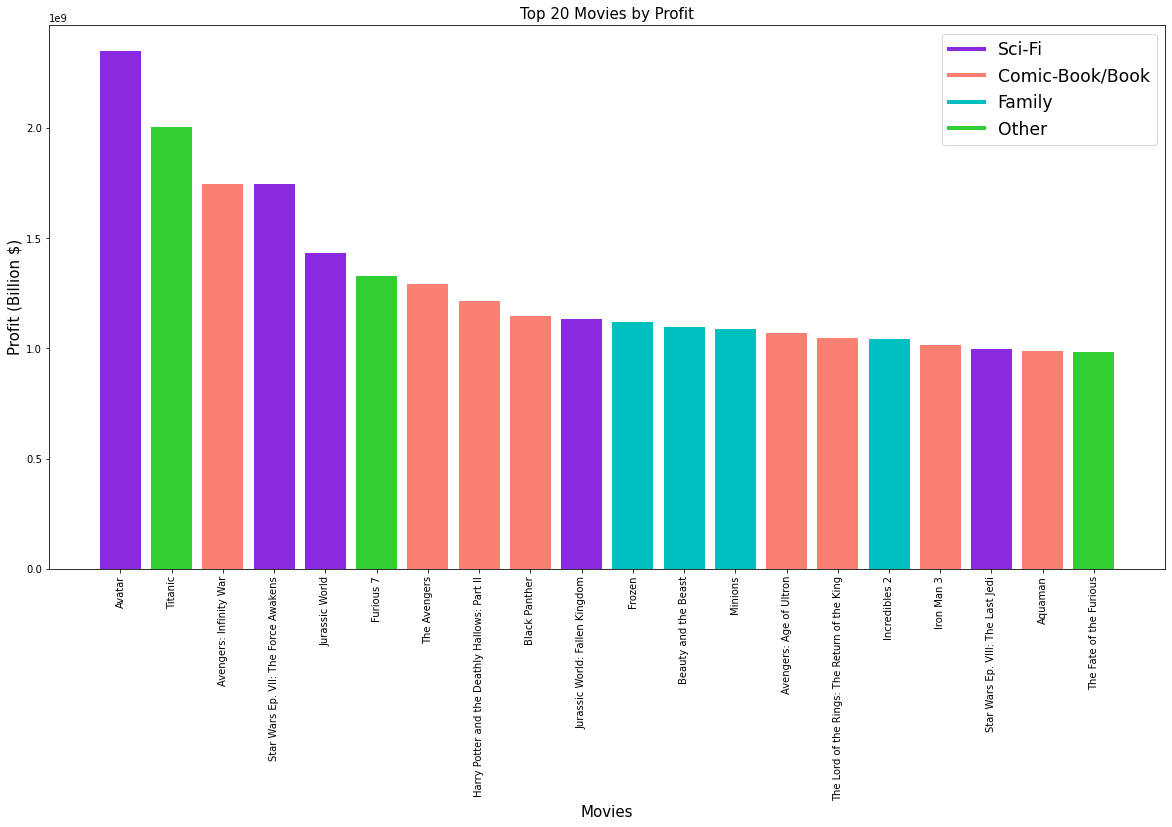

In [10]:
# Plot a bar graph of the most common names 
fig, ax = plt.subplots(figsize = (20,10))


ax.bar(top_20_profit['movie'], top_20_profit['profit'] , color = ['blueviolet','limegreen','salmon','blueviolet','blueviolet','limegreen','salmon','salmon','salmon','blueviolet','c','c','c','salmon','salmon','c','salmon','blueviolet','salmon','limegreen'])

# Add labels for x and y axes
ax.set_xlabel('Movies', fontsize = 15)
ax.set_ylabel('Profit (Billion $)', fontsize = 15)

#setting color
custom_lines = [Line2D([0], [0], color="blueviolet", lw=4),
                Line2D([0], [0], color="salmon", lw=4),
                Line2D([0], [0], color="c", lw=4),
                Line2D([0], [0], color="limegreen", lw=4)]

# Add a title for the plot
ax.set_title('Top 20 Movies by Profit', fontsize=15)

ax.tick_params(axis='x', labelrotation = 90)

# add a legend 
plt.legend(custom_lines, ['Sci-Fi', 'Comic-Book/Book', 'Family', 'Other'], fontsize="xx-large") 

## What Movies have the best rate of return?

In [11]:
df_return_rate = df_2.sort_values(by=['return_rate'], ascending = False )
df_return_rate = df_return_rate.drop(labels=5745, axis=0)
df_return_rate = df_return_rate.drop(labels=5612, axis=0)
top_20_rate_of_return = df_return_rate.head(20)


In [12]:
top_20_rate_of_return

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,return_rate
5613,14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,99550000,497.750000
5492,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,193733034,430.517853
5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41556474,415.564740
5406,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,247700000,412.833333
5709,10,"May 7, 2004",Super Size Me,65000,11529368,22233808,22168808,341.058585
5346,47,"Aug 13, 1942",Bambi,858000,102797000,268000000,267142000,311.354312
5773,74,"Feb 26, 1993",El Mariachi,7000,2040920,2041928,2034928,290.704000
5676,77,"Oct 1, 1968",Night of the Living Dead,114000,12087064,30087064,29973064,262.921614
5210,11,"Nov 21, 1976",Rocky,1000000,117235147,225000000,224000000,224.000000
5536,37,"Oct 17, 1978",Halloween,325000,47000000,70000000,69675000,214.384615


[Text(0, 0, 'Mad Max'),
 Text(1, 0, 'Paranormal Activity'),
 Text(2, 0, 'The Gallows'),
 Text(3, 0, 'The Blair Witch Project'),
 Text(4, 0, 'Super Size Me'),
 Text(5, 0, 'Bambi'),
 Text(6, 0, 'El Mariachi'),
 Text(7, 0, 'Night of the Living Dead'),
 Text(8, 0, 'Rocky'),
 Text(9, 0, 'Halloween'),
 Text(10, 0, 'The Brothers McMullen'),
 Text(11, 0, 'The Texas Chainsaw Massacre'),
 Text(12, 0, 'American Graffiti'),
 Text(13, 0, 'My Date With Drew'),
 Text(14, 0, 'Once'),
 Text(15, 0, 'Clerks'),
 Text(16, 0, 'Snow White and the Seven Dwarfs'),
 Text(17, 0, 'Billy Jack'),
 Text(18, 0, 'Primer'),
 Text(19, 0, 'In the Company of Men')]

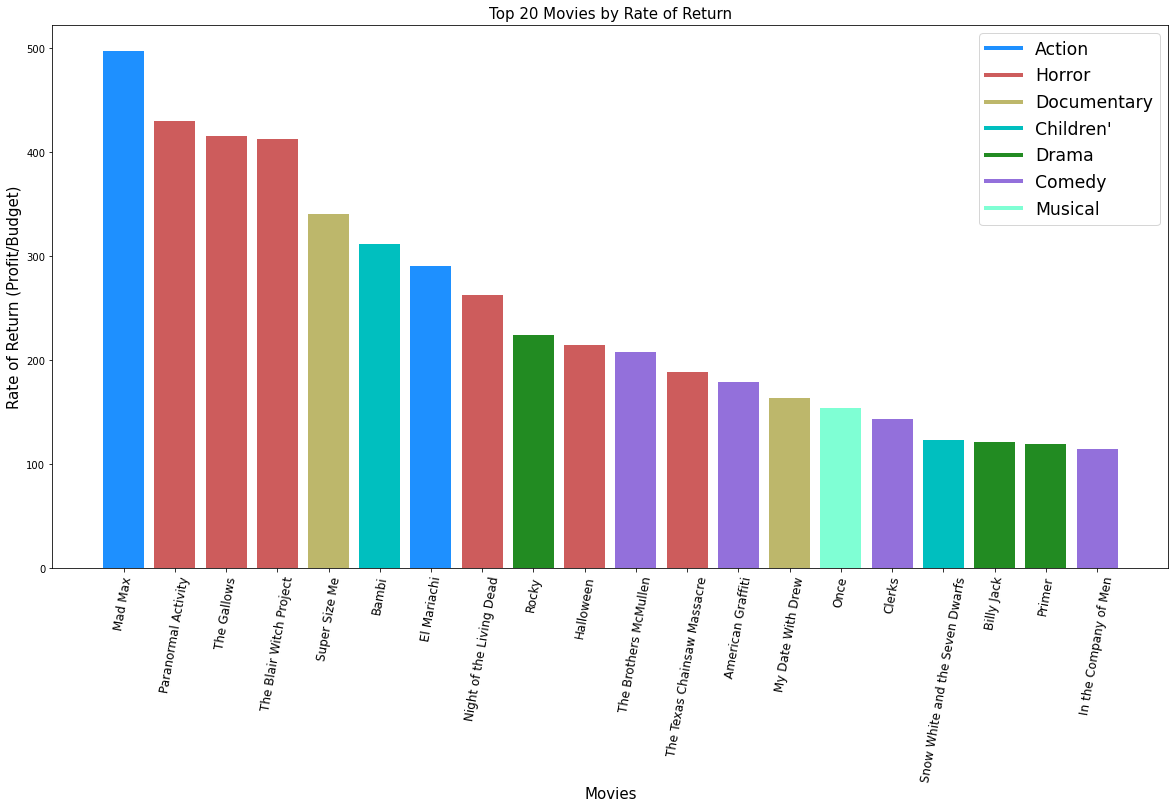

In [13]:
# Plot a bar graph of the most common names 
fig, ax = plt.subplots(figsize = (20,10))


ax.bar(top_20_rate_of_return['movie'], top_20_rate_of_return['return_rate'] , color = ['dodgerblue','indianred','indianred','indianred','darkkhaki','c','dodgerblue','indianred','forestgreen','indianred','mediumpurple','indianred','mediumpurple','darkkhaki','aquamarine','mediumpurple','c','forestgreen','forestgreen','mediumpurple'])

# Add labels for x and y axes
ax.set_xlabel('Movies', fontsize = 15)
ax.set_ylabel('Rate of Return (Profit/Budget)', fontsize = 15)

#setting color
custom_lines = [Line2D([0], [0], color="dodgerblue", lw=4),
                Line2D([0], [0], color="indianred", lw=4),
                Line2D([0], [0], color="darkkhaki", lw=4),
                Line2D([0], [0], color="c", lw=4),
                Line2D([0], [0], color="forestgreen", lw=4),
                Line2D([0], [0], color="mediumpurple", lw=4),
                Line2D([0], [0], color="aquamarine", lw=4)]

# Add a title for the plot
ax.set_title('Top 20 Movies by Rate of Return', fontsize=15)

ax.tick_params(axis='x', labelrotation = 80)

# add a legend 
plt.legend(custom_lines, ['Action', 'Horror', 'Documentary', 'Children\'','Drama','Comedy','Musical'], fontsize="xx-large") ###

ax.set_xticklabels(top_20_rate_of_return['movie'], fontsize = 12)


## What time of year Is the best time to release a movie?

In [14]:
df_release_date = df.sort_values(by=['release_date'] )


In [15]:
df_release_date["release_date"] = df_release_date["release_date"].str.replace(",","")
df_release_date["release_date"] = df_release_date["release_date"].str.replace(" ",",")

In [16]:
df_release_date

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,return_rate
5559,60,"Apr,1,1975",Death Race 2000,300000,0,0,-300000,-1.000000
5520,21,"Apr,1,1986",My Beautiful Laundrette,400000,0,0,-400000,-1.000000
2260,61,"Apr,1,1988","Bright Lights, Big City",25000000,16118077,16118077,-8881923,-0.355277
5769,70,"Apr,1,1996",Bang,10000,527,527,-9473,-0.947300
1408,9,"Apr,1,2005",Sin City,40000000,74103820,158527918,118527918,2.963198
...,...,...,...,...,...,...,...,...
849,50,"Sep,9,2016",Sully,60000000,125070033,238524556,178524556,2.975409
3287,88,"Sep,9,2016",Robinson Crusoe,13000000,8005586,42446455,29446455,2.265112
3712,13,"Sep,9,2016",Kicks,10000000,150191,150191,-9849809,-0.984981
3129,30,"Sep,9,2016",The Disappointments Room,15000000,2423467,3503761,-11496239,-0.766416


In [17]:
df_release_date['day'] = 1 
df_release_date['year'] = 2
split =  df_release_date['release_date'].str.split(',', expand=True)
df_release_date['month'], df_release_date['day'], df_release_date['year']= split[0], split[1], split[2]
df_release_date

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,return_rate,day,year,month
5559,60,"Apr,1,1975",Death Race 2000,300000,0,0,-300000,-1.000000,1,1975,Apr
5520,21,"Apr,1,1986",My Beautiful Laundrette,400000,0,0,-400000,-1.000000,1,1986,Apr
2260,61,"Apr,1,1988","Bright Lights, Big City",25000000,16118077,16118077,-8881923,-0.355277,1,1988,Apr
5769,70,"Apr,1,1996",Bang,10000,527,527,-9473,-0.947300,1,1996,Apr
1408,9,"Apr,1,2005",Sin City,40000000,74103820,158527918,118527918,2.963198,1,2005,Apr
...,...,...,...,...,...,...,...,...,...,...,...
849,50,"Sep,9,2016",Sully,60000000,125070033,238524556,178524556,2.975409,9,2016,Sep
3287,88,"Sep,9,2016",Robinson Crusoe,13000000,8005586,42446455,29446455,2.265112,9,2016,Sep
3712,13,"Sep,9,2016",Kicks,10000000,150191,150191,-9849809,-0.984981,9,2016,Sep
3129,30,"Sep,9,2016",The Disappointments Room,15000000,2423467,3503761,-11496239,-0.766416,9,2016,Sep


### Movie Release Month VS.Rate of Return

In [18]:
release_date_description = df_release_date.groupby("month")["return_rate"].describe()
release_date_description


,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
Apr,454.0,2.776726,9.499173,-1.0,-0.594553,0.399866,2.200956,88.586336
Aug,496.0,4.380376,21.831653,-1.0,-0.520832,0.682874,2.491990,311.354312
Dec,745.0,2.268624,7.620173,-1.0,-0.797278,0.628805,2.606233,123.277880
Feb,392.0,3.547812,16.939387,-1.0,-0.506205,0.740280,2.881151,290.704000
Jan,347.0,3.198986,11.622580,-1.0,-0.599711,0.512054,3.045932,121.500000
Jul,440.0,5.040113,28.871610,-1.0,-0.115222,1.244067,3.425571,415.564740
Jun,479.0,6.889714,82.475456,-1.0,-0.273736,1.252110,3.480891,1799.000000
Mar,470.0,3.449646,23.971119,-1.0,-0.490590,0.531329,2.468968,497.750000
May,407.0,4.351029,20.738396,-1.0,-0.426954,1.075749,3.267132,341.058585


In [19]:
new_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

release_date_description = release_date_description.reindex(new_order, axis=0)
release_date_description

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
Jan,347.0,3.198986,11.622580,-1.0,-0.599711,0.512054,3.045932,121.500000
Feb,392.0,3.547812,16.939387,-1.0,-0.506205,0.740280,2.881151,290.704000
Mar,470.0,3.449646,23.971119,-1.0,-0.490590,0.531329,2.468968,497.750000
Apr,454.0,2.776726,9.499173,-1.0,-0.594553,0.399866,2.200956,88.586336
May,407.0,4.351029,20.738396,-1.0,-0.426954,1.075749,3.267132,341.058585
Jun,479.0,6.889714,82.475456,-1.0,-0.273736,1.252110,3.480891,1799.000000
Jul,440.0,5.040113,28.871610,-1.0,-0.115222,1.244067,3.425571,415.564740
Aug,496.0,4.380376,21.831653,-1.0,-0.520832,0.682874,2.491990,311.354312
Sep,493.0,2.824510,20.535113,-1.0,-0.668707,0.300893,1.981620,430.517853


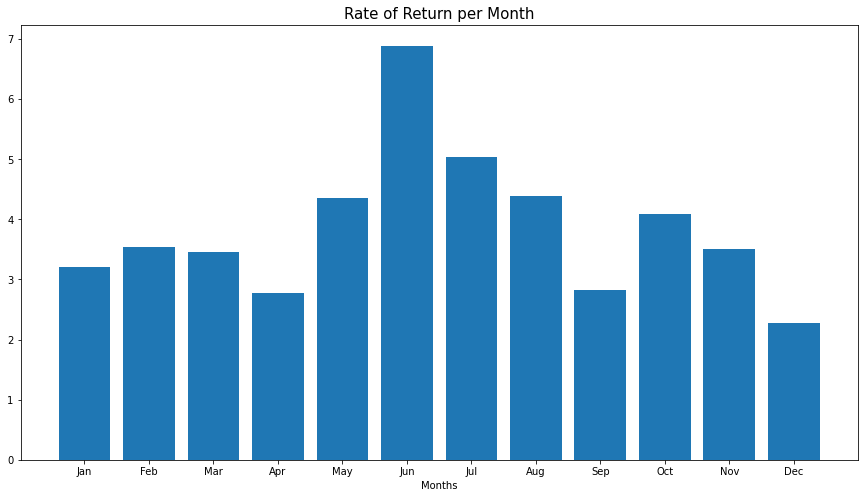

In [20]:
# Plot a bar graph of the most common names 
fig, ax = plt.subplots(figsize = (15,8))


ax.bar(release_date_description.index, release_date_description['mean'] )

# Add labels for x and y axes
ax.set_xlabel('Months')


# Add a title for the plot
ax.set_title('Rate of Return per Month', fontsize=15)

ax.tick_params(axis='x', labelrotation = 0)



### Movie Release Month VS. Profit

In [21]:
release_date_description_2 = df_release_date.groupby("month")["profit"].describe()
release_date_description_2

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
Apr,454.0,3.611743e+07,1.340386e+08,-94635231.0,-2361000.50,4639885.0,3.111006e+07,1.748134e+09
Aug,496.0,3.542232e+07,7.962152e+07,-92905005.0,-3058056.75,6972068.5,4.559244e+07,6.328063e+08
Dec,745.0,6.844157e+07,1.842696e+08,-150000000.0,-2293832.00,7836366.0,7.501533e+07,2.351345e+09
Feb,392.0,4.349811e+07,1.055342e+08,-82000000.0,-3477875.50,10443556.0,5.249171e+07,1.148258e+09
Jan,347.0,2.572033e+07,5.757565e+07,-75978328.0,-3124897.00,5322212.0,3.774160e+07,3.775991e+08
Jul,440.0,9.841746e+07,1.830251e+08,-61583254.0,-301360.00,21117855.5,1.101144e+08,1.216693e+09
Jun,479.0,9.942391e+07,1.884004e+08,-200237650.0,-885968.50,21129194.0,1.374956e+08,1.433855e+09
Mar,470.0,4.985129e+07,1.240377e+08,-110450242.0,-2000000.00,7811580.5,5.059461e+07,1.099200e+09
May,407.0,1.151328e+08,2.075069e+08,-50274337.0,-1365510.50,13609577.0,1.297137e+08,1.292936e+09


In [22]:
new_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

release_date_description_2 = release_date_description_2.reindex(new_order, axis=0)
release_date_description_2

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
Jan,347.0,2.572033e+07,5.757565e+07,-75978328.0,-3124897.00,5322212.0,3.774160e+07,3.775991e+08
Feb,392.0,4.349811e+07,1.055342e+08,-82000000.0,-3477875.50,10443556.0,5.249171e+07,1.148258e+09
Mar,470.0,4.985129e+07,1.240377e+08,-110450242.0,-2000000.00,7811580.5,5.059461e+07,1.099200e+09
Apr,454.0,3.611743e+07,1.340386e+08,-94635231.0,-2361000.50,4639885.0,3.111006e+07,1.748134e+09
May,407.0,1.151328e+08,2.075069e+08,-50274337.0,-1365510.50,13609577.0,1.297137e+08,1.292936e+09
Jun,479.0,9.942391e+07,1.884004e+08,-200237650.0,-885968.50,21129194.0,1.374956e+08,1.433855e+09
Jul,440.0,9.841746e+07,1.830251e+08,-61583254.0,-301360.00,21117855.5,1.101144e+08,1.216693e+09
Aug,496.0,3.542232e+07,7.962152e+07,-92905005.0,-3058056.75,6972068.5,4.559244e+07,6.328063e+08
Sep,493.0,2.488078e+07,6.573886e+07,-73699549.0,-3876149.00,1410835.0,3.100830e+07,6.624580e+08


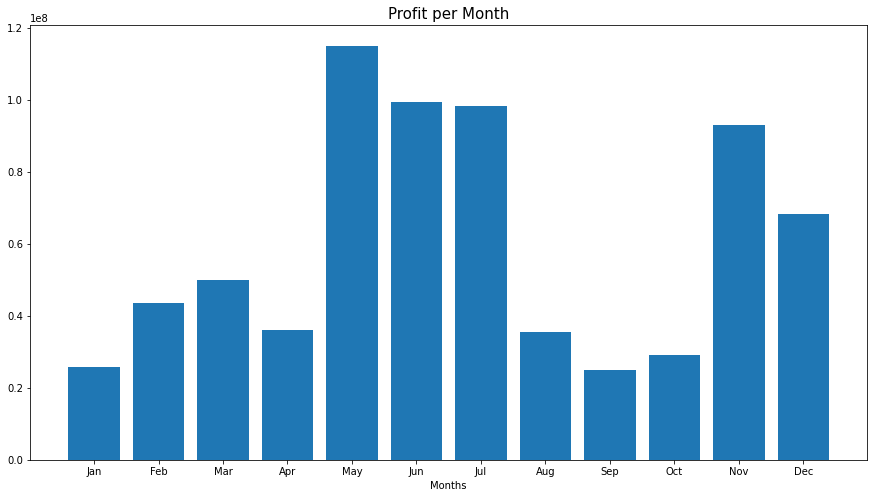

In [23]:
# Plot a bar graph of the most common names 
fig, ax = plt.subplots(figsize = (15,8))


ax.bar(release_date_description_2.index, release_date_description_2['mean'] )

# Add labels for x and y axes
ax.set_xlabel('Months')


# Add a title for the plot
ax.set_title('Profit per Month', fontsize=15)

ax.tick_params(axis='x', labelrotation = 0)

